In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

#this is a python magic function to automatically show matplotlib plots
%matplotlib inline      

In [2]:
repeats = pd.read_csv('../data/repeat_callers.csv') 
one_times = pd.read_csv('../data/one_time_callers.csv')

C:\Users\jenwh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (30,33,67,68,76,78,82) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
repeats.CallReportNum.nunique()

7072

In [4]:
repeats.CallerNum.nunique()

58

(array([2.933e+03, 3.123e+03, 8.830e+02, 1.080e+02, 2.000e+01, 2.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  9.4, 17.8, 26.2, 34.6, 43. , 51.4, 59.8, 68.2, 76.6, 85. ]),
 <BarContainer object of 10 artists>)

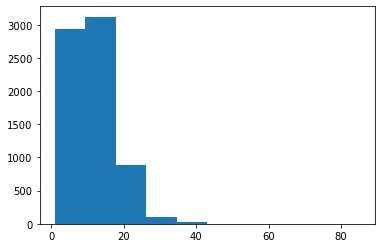

In [5]:
plt.hist(repeats.CallLength)

In [6]:
list(repeats.columns)

['Unnamed: 0',
 'CallReportNum',
 'ReportVersion',
 'CallDateAndTimeStart',
 'CallDateAndTimeEnd',
 'CallLength',
 'CallerNum',
 'PhoneWorkerNum',
 'CityName',
 'CountyName',
 'StateProvince',
 'CountryName',
 'PostalCode',
 'ThirdPartyStateProvince',
 'ThirdPartyPostalCode',
 'Feedback',
 'CallersFeedback',
 'EnteredByWorkerNum',
 'EnteredOn',
 'Reviewed',
 'FeedbackStatus',
 'FeedbackFromPhoneWorkerNum',
 'FeedbackFromPhoneWorkerName',
 'ReferralsMade',
 'OrgNum',
 'CRISIS Demographics - Occupation',
 'CRISIS SOSL Call - Caller Email (Optional for interest in SOSL Group)',
 'CRISIS Success Story - Does this call have a success story? If so please describe:',
 'CRISIS Unsuccessful Outcome - If checked please add reason for Unsuccessful Resolution:',
 'NSPL Phone Line - NSPL - If Veteran why didnt they press 1 for Veterans when calling Lifeline other reason?',
 'Transfer Information - Other Crisis Line/Agency name or number',
 'CRISIS Additional Reporting - ADD APS Report',
 'CRISIS Ad

In [18]:
cols = ['CallerNum',
 'CRISIS Demographics - Occupation',
 'CRISIS Demographics - Age',
 'CRISIS Demographics - Education Level',
 'CRISIS Demographics - Ethnicity',
 'CRISIS Demographics - Gender Identity',
 'CRISIS Demographics - Has a disability?',
 'CRISIS Demographics - Homeless?',
 'CRISIS Demographics - Income',
 'CRISIS Demographics - Marital Status',
 'CRISIS Demographics - Military']
unique_callers = repeats[cols]

In [9]:
unique_callers = unique_callers.drop_duplicates('CallerNum')

In [12]:
demo_cols = ['CRISIS Demographics - Occupation',
 'CRISIS Demographics - Age',
 'CRISIS Demographics - Education Level',
 'CRISIS Demographics - Ethnicity',
 'CRISIS Demographics - Gender Identity',
 'CRISIS Demographics - Has a disability?',
 'CRISIS Demographics - Homeless?',
 'CRISIS Demographics - Income',
 'CRISIS Demographics - Marital Status',
 'CRISIS Demographics - Military']
demo_cols

['CRISIS Demographics - Occupation',
 'CRISIS Demographics - Age',
 'CRISIS Demographics - Education Level',
 'CRISIS Demographics - Ethnicity',
 'CRISIS Demographics - Gender Identity',
 'CRISIS Demographics - Has a disability?',
 'CRISIS Demographics - Homeless?',
 'CRISIS Demographics - Income',
 'CRISIS Demographics - Marital Status',
 'CRISIS Demographics - Military']

In [13]:
def get_all_issues(col_name, df, sep = '; '):
    col = df[col_name]
    issue_list = col.dropna().astype(str).str.split(sep)
    full_list = list(issue_list.sum())
    return full_list

In [14]:
def create_dict_count(col, df):
    col_dict = {}
    col_list = get_all_issues(col, df)
    for item in col_list:
        try:
            col_dict[item] += 1
        except:
            col_dict[item] = 1
    return col_dict

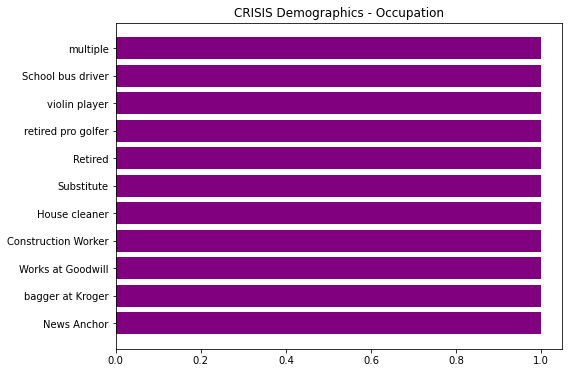

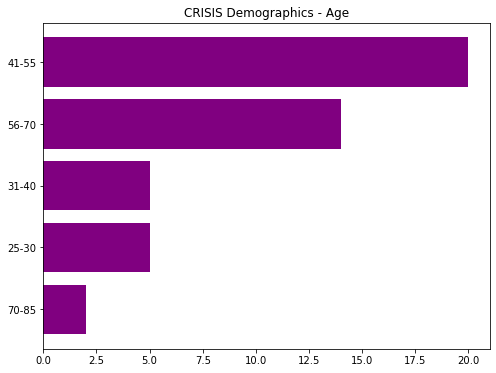

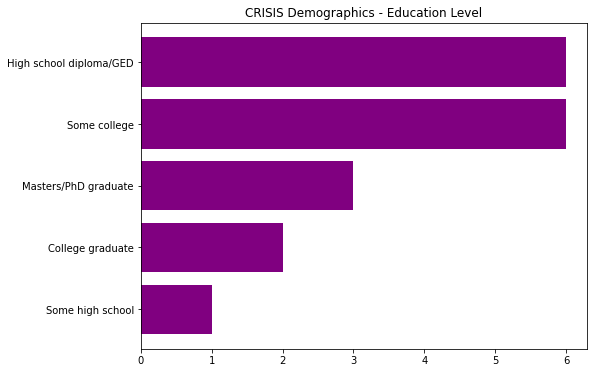

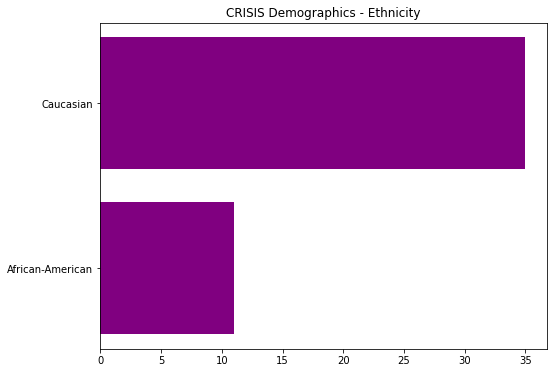

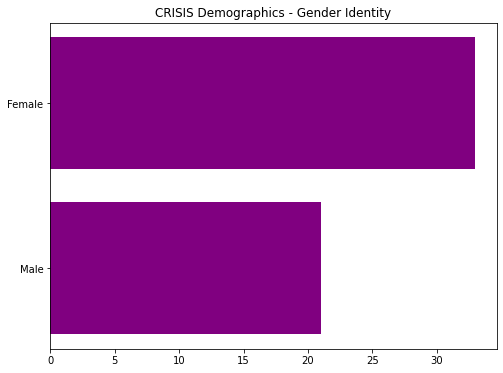

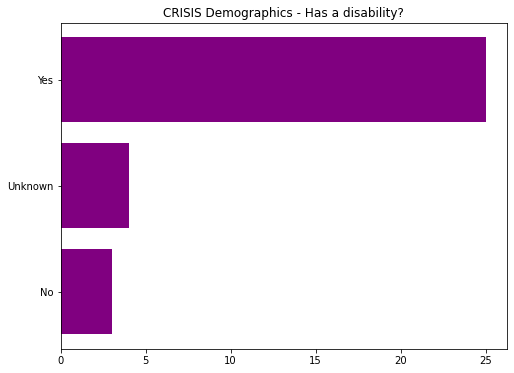

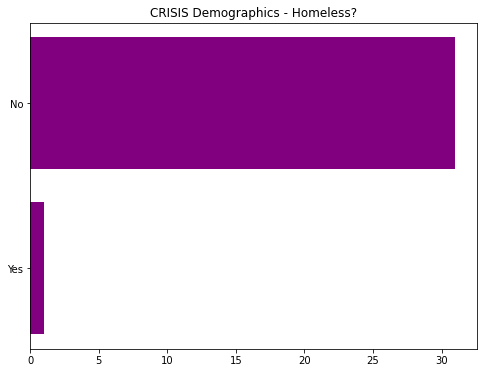

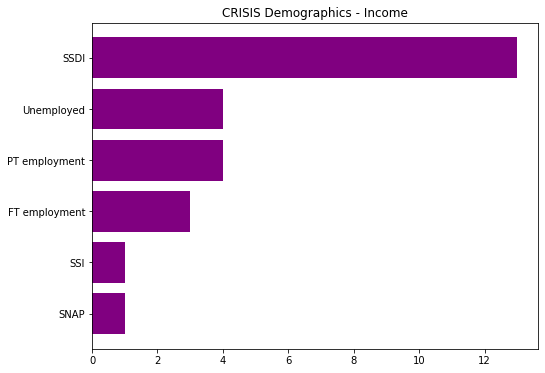

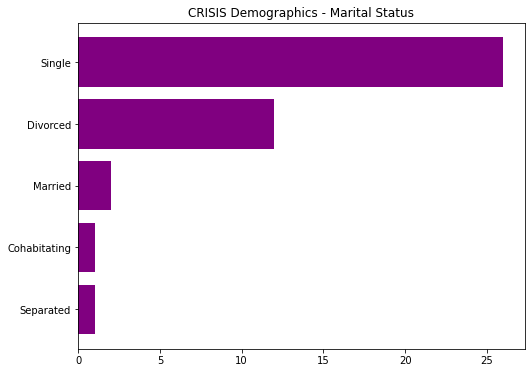

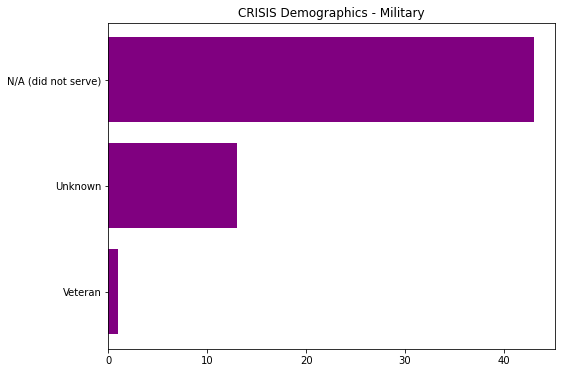

In [17]:
for item in demo_cols:
    my_dict = create_dict_count(item, unique_callers)
    my_dict = dict(sorted(my_dict.items(), key = lambda item: item[1]))
    plt.figure(figsize = (8, 6))
    plt.barh(y = list(my_dict.keys()), width = list(my_dict.values()), color = 'purple')
#     plt.xticks(rotation = 90)
    plt.title(item)